<a href="https://colab.research.google.com/github/mastersigat/Script_Python_M2SIGAT/blob/main/BDTOPO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

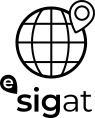


---



Le but de ce travail est d'obtenir à l'échelle des IRIS rennais la répartition de l'usage des bâtiments présents dans chaque IRIS

#**Les données batis issus de la BD Topo**

 ✴ travail qui vous est proposé par Elyott Tigier, Pierre Corbin et Charlie Deshayes ✴



## Initialisation de l'environnement

In [ ]:
#Initialisation de l'environnement avec geopandas
!apt update
!apt install gdal-bin python-gdal python3-gdal 
## Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!git clone https://github.com/geopandas/geopandas.git
!pip install geopandas
# Instal contextily (fonds de carte)
!pip install contextily
# Install mapclassify (cartographie thématique)
!pip install mapclassify
#Depuis sa version 0.8, Geopandas peut fonctionner de manière expérimental avec Pygeos ce qui accèlère certaines opérations
!pip install pygeos
# Pour la cartographie interactive
!pip install folium

In [ ]:
#Importation des librairies nécessaires
import pandas as pd #Gestion de données
import matplotlib as plt #Visualisation de données
import geopandas as gpd #Gestion données spatiales
import pygeos #Opérations sur les géométrie de données spatiales
import contextily as ctx #Fonds de carte
import numpy as np #Manipulation de tableaux
import shapely #Manipulation de géométrie
import folium #Cartographie interactive
import mapclassify #Cartographie thématique

##Importer les données

In [ ]:
# Installation des packages pour la décompression

!pip install pyunpack
!pip install patool

CREER UN DOSSIER "bdtopo"

In [ ]:
# Décompression

from pyunpack import Archive
Archive('bdtopo.7z').extractall("bdtopo")

In [ ]:
# Chargement de la couche du bâti

Batiments = gpd.read_file("/content/bdtopo/BDTOPO_3-0_TOUSTHEMES_GPKG_LAMB93_D035_2021-12-15/BDTOPO/1_DONNEES_LIVRAISON_2021-12-00186/BDT_3-0_GPKG_LAMB93_D035-ED2021-12-15/BDT_3-0_GPKG_LAMB93_D035-ED2021-12-15.gpkg", layer="batiment")  

In [ ]:
# Affichage des 3 premières entités

Batiments.head(3)

,cleabs,nature,usage_1,usage_2,construction_legere,etat_de_l_objet,date_creation,date_modification,date_d_apparition,date_de_confirmation,...,materiaux_des_murs,materiaux_de_la_toiture,hauteur,altitude_minimale_sol,altitude_minimale_toit,altitude_maximale_toit,altitude_maximale_sol,origine_du_batiment,appariement_fichiers_fonciers,geometry
0,BATIMENT0000000047127114,Indifférenciée,Indifférencié,None,False,En service,2006-12-18T13:00:39.005001+00:00,2012-03-19T12:46:20.322001+00:00,None,None,...,None,None,2.3,109.2,NaN,NaN,NaN,Imagerie aérienne,None,MULTIPOLYGON Z (((313313.700 6800012.300 111.4...
1,BATIMENT0000000047202703,"Industriel, agricole ou commercial",Industriel,None,False,En service,2006-12-18T13:00:39.005001+00:00,2012-03-13T14:34:09.746000+00:00,None,None,...,None,None,3.3,37.1,NaN,NaN,NaN,Imagerie aérienne,None,MULTIPOLYGON Z (((355034.400 6786406.800 40.40...
2,BATIMENT0000000076347407,Indifférenciée,Résidentiel,None,False,En service,2007-05-15T10:59:17.726999+00:00,2019-03-25T06:35:45.064999+00:00,1990-01-01,None,...,13,20,3.4,27.8,NaN,34.8,28.0,Imagerie aérienne,B 0.2,MULTIPOLYGON Z (((317914.500 6848554.300 31.20...


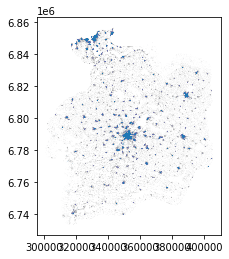

In [ ]:
# Affichage de tous les bâtiments

Batiments.plot()

In [ ]:
#Téléchargement des IRIS de Rennes

!wget http://files.opendatarchives.fr/professionnels.ign.fr/iris_ge/IRIS-GE_2-0__SHP_LAMB93_D035_2021-01-01.7z -O iris35.7z

--2022-04-24 17:09:55--  http://files.opendatarchives.fr/professionnels.ign.fr/iris_ge/IRIS-GE_2-0__SHP_LAMB93_D035_2021-01-01.7z
Resolving files.opendatarchives.fr (files.opendatarchives.fr)... 212.129.55.232
Connecting to files.opendatarchives.fr (files.opendatarchives.fr)|212.129.55.232|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3140591 (3.0M) [application/x-7z-compressed]
Saving to: ‘iris35.zip’

iris35.zip          100%[===================>]   2.99M  2.67MB/s    in 1.1s    

2022-04-24 17:09:57 (2.67 MB/s) - ‘iris35.zip’ saved [3140591/3140591]



CREATION DU DOSSIER IRIS 35

In [ ]:
# Décompression

Archive('iris35.7z').extractall("iris35")

In [ ]:
Iris35 = gpd.read_file("/content/iris35/IRIS-GE_2-0__SHP_LAMB93_D035_2021-01-01/IRIS-GE/1_DONNEES_LIVRAISON_2021-06-00052/IRIS-GE_2-0_SHP_LAMB93_D035-2021/IRIS_GE.SHP")  

In [ ]:
Iris35.head(3)

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry
0,35117,Gaël,0000,351170000,Gaël,Z,"POLYGON ((314427.100 6788518.300, 314428.500 6..."
1,35236,Redon,0101,352360101,Centre-Le Port,H,"POLYGON ((316680.300 6740917.800, 316685.400 6..."
2,35236,Redon,0102,352360102,Beaumont-Nord,H,"POLYGON ((316913.400 6741207.800, 316945.900 6..."


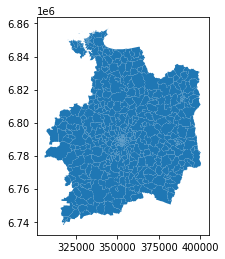

In [ ]:
Iris35.plot()

##Préparation des couches 

In [ ]:
# Vérifier le SCR des couches

Batiments.crs


<Projected CRS: EPSG:2154>
Name: RGF93 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica.
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
Iris35.crs

<Projected CRS: EPSG:2154>
Name: RGF93 / Lambert-93
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: France - onshore and offshore, mainland and Corsica.
- bounds: (-9.86, 41.15, 10.38, 51.56)
Coordinate Operation:
- name: Lambert-93
- method: Lambert Conic Conformal (2SP)
Datum: Reseau Geodesique Francais 1993
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

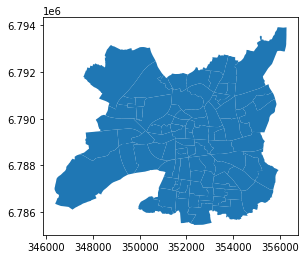

In [ ]:
#Garder uniquement les IRIS de Rennes

IRISRENNES = Iris35[(Iris35["INSEE_COM"] == '35238')]
IRISRENNES.plot()


In [ ]:
IRISRENNES.head(5)

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry
31,35238,Rennes,0107,352380107,Dalle du Colombier,H,"POLYGON ((352052.700 6788540.000, 352011.900 6..."
37,35238,Rennes,1201,352381201,Les Hautes Chalais,H,"POLYGON ((351599.200 6786890.000, 351593.600 6..."
39,35238,Rennes,0806,352380806,Margueritte,H,"POLYGON ((351790.000 6787408.100, 351773.000 6..."
40,35238,Rennes,0104,352380104,Parcheminerie Toussaints,H,"POLYGON ((351548.900 6789018.100, 351549.500 6..."
42,35238,Rennes,0105,352380105,Liberté Champ de Mars,H,"POLYGON ((351539.400 6788683.500, 351540.100 6..."


In [ ]:
#Ne garder que les bâtiments de Rennes

BatRennes = gpd.overlay(Batiments, IRISRENNES, how='intersection')

In [ ]:
BatRennes.head()

,cleabs,nature,usage_1,usage_2,construction_legere,etat_de_l_objet,date_creation,date_modification,date_d_apparition,date_de_confirmation,...,altitude_maximale_sol,origine_du_batiment,appariement_fichiers_fonciers,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry
0,BATIMENT0000000047202703,"Industriel, agricole ou commercial",Industriel,None,False,En service,2006-12-18T13:00:39.005001+00:00,2012-03-13T14:34:09.746000+00:00,None,None,...,NaN,Imagerie aérienne,None,35238,Rennes,0705,352380705,La Poterie Sud,H,"POLYGON Z ((355036.300 6786408.200 40.400, 355..."
1,BATIMENT0000000297098870,Indifférenciée,Commercial et services,None,True,En service,2012-03-13T15:05:04.765000+00:00,2019-07-01T14:08:59.507999+00:00,None,None,...,53.7,Cadastre,None,35238,Rennes,0705,352380705,La Poterie Sud,H,"POLYGON Z ((354959.700 6787205.100 59.000, 354..."
2,BATIMENT0000000297098871,Indifférenciée,Commercial et services,None,True,En service,2012-03-13T15:05:04.765000+00:00,2019-07-01T14:08:59.507999+00:00,None,None,...,53.6,Cadastre,None,35238,Rennes,0705,352380705,La Poterie Sud,H,"POLYGON Z ((354971.400 6787196.700 57.500, 354..."
3,BATIMENT0000000297098878,Indifférenciée,Commercial et services,None,True,En service,2012-03-13T15:05:04.765000+00:00,2019-07-01T14:08:59.507999+00:00,None,None,...,53.3,Cadastre,None,35238,Rennes,0705,352380705,La Poterie Sud,H,"POLYGON Z ((354938.500 6787182.500 63.400, 354..."
4,BATIMENT0000000297098879,Indifférenciée,Commercial et services,None,True,En service,2012-03-13T15:05:04.765000+00:00,2019-07-01T14:08:59.507999+00:00,None,None,...,53.5,Cadastre,None,35238,Rennes,0705,352380705,La Poterie Sud,H,"POLYGON Z ((354914.300 6787198.200 63.600, 354..."


In [ ]:
BatRennes.size

1384096

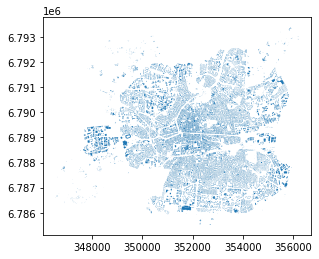

In [ ]:
BatRennes.plot()

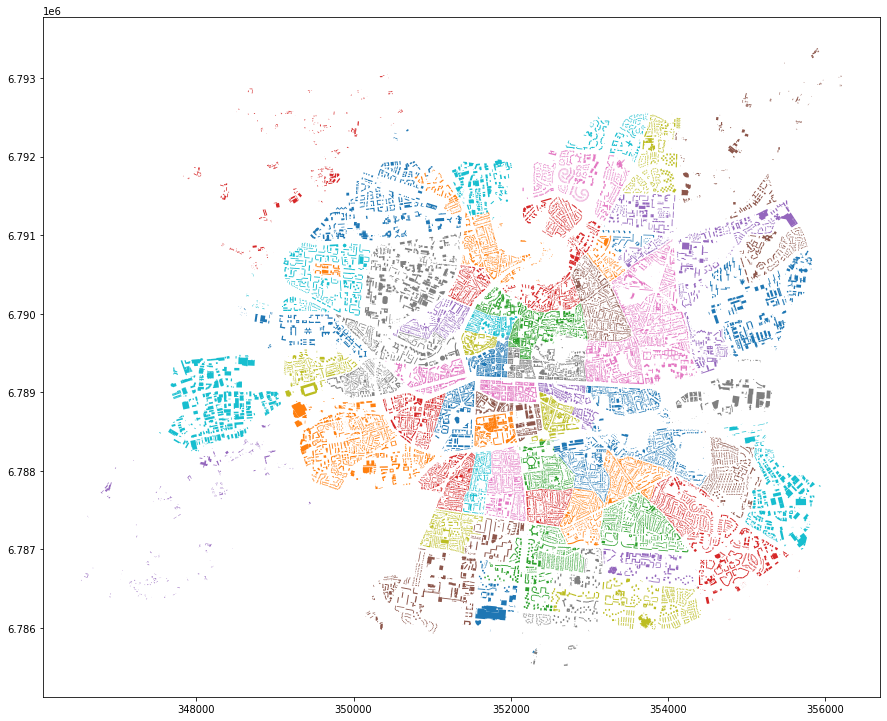

In [ ]:
# Carte des bâtiments par IRIS

map = BatRennes.plot(figsize=(15,15), column='NOM_IRIS').get_figure()

In [ ]:
# Calcul du  nombre de batiments par IRIS

NbBatiIRIS = BatRennes.groupby("NOM_IRIS").agg({'usage_1':'count'})
NbBatiIRIS = pd.DataFrame(NbBatiIRIS)
NbBatiIRIS = NbBatiIRIS.rename(columns={0: 'NbBatis'})
NbBatiIRIS

,NbBatis
NOM_IRIS,
Albert de Mun,827
Alphonse Guérin,706
Arsenal,461
Beauregard,372
Brno,83
...,...
Villeneuve,495
Z.A. Nord,205
Z.A. Ouest,417


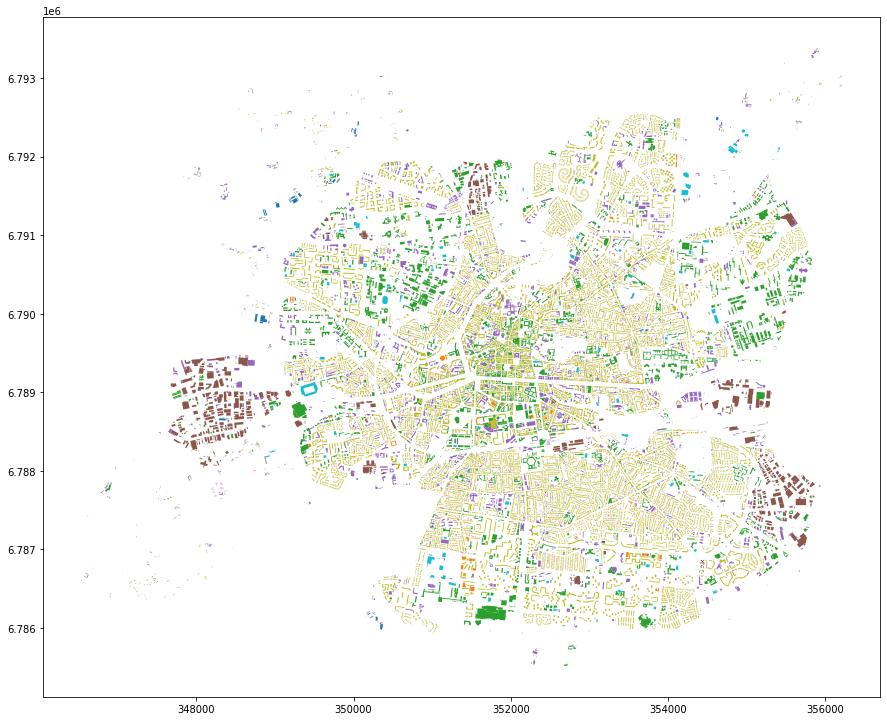

In [ ]:
# Carte des bâtiments par "usage_1"

map2 = BatRennes.plot(figsize=(15,15), column='usage_1').get_figure()

In [ ]:
NbBatiIRISusage = BatRennes.groupby("nature").size()
NbBatiIRISusage

nature
Chapelle                                  7
Château                                   5
Eglise                                   53
Indifférenciée                        41301
Industriel, agricole ou commercial     1824
Monument                                  2
Serre                                    26
Silo                                     23
Tour, donjon                              4
Tribune                                   8
dtype: int64

In [ ]:
NbBatiIRISusage = BatRennes.groupby("usage_1").size()
NbBatiIRISusage

usage_1
Agricole                     66
Annexe                     4160
Commercial et services     3393
Indifférencié             13758
Industriel                  580
Religieux                    56
Résidentiel               21112
Sportif                     128
dtype: int64

In [ ]:
BatRennesCOMSERV = BatRennes[(BatRennes["usage_1"] == 'Commercial et services')]
BatRennesCOMSERV

,cleabs,nature,usage_1,usage_2,construction_legere,etat_de_l_objet,date_creation,date_modification,date_d_apparition,date_de_confirmation,...,altitude_maximale_sol,origine_du_batiment,appariement_fichiers_fonciers,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry
1,BATIMENT0000000297098870,Indifférenciée,Commercial et services,None,True,En service,2012-03-13T15:05:04.765000+00:00,2019-07-01T14:08:59.507999+00:00,None,None,...,53.7,Cadastre,None,35238,Rennes,0705,352380705,La Poterie Sud,H,"POLYGON Z ((354959.700 6787205.100 59.000, 354..."
2,BATIMENT0000000297098871,Indifférenciée,Commercial et services,None,True,En service,2012-03-13T15:05:04.765000+00:00,2019-07-01T14:08:59.507999+00:00,None,None,...,53.6,Cadastre,None,35238,Rennes,0705,352380705,La Poterie Sud,H,"POLYGON Z ((354971.400 6787196.700 57.500, 354..."
3,BATIMENT0000000297098878,Indifférenciée,Commercial et services,None,True,En service,2012-03-13T15:05:04.765000+00:00,2019-07-01T14:08:59.507999+00:00,None,None,...,53.3,Cadastre,None,35238,Rennes,0705,352380705,La Poterie Sud,H,"POLYGON Z ((354938.500 6787182.500 63.400, 354..."
4,BATIMENT0000000297098879,Indifférenciée,Commercial et services,None,True,En service,2012-03-13T15:05:04.765000+00:00,2019-07-01T14:08:59.507999+00:00,None,None,...,53.5,Cadastre,None,35238,Rennes,0705,352380705,La Poterie Sud,H,"POLYGON Z ((354914.300 6787198.200 63.600, 354..."
5,BATIMENT0000000297098880,Indifférenciée,Commercial et services,None,False,En service,2012-03-13T15:05:04.765000+00:00,2019-07-01T14:08:59.507999+00:00,None,None,...,53.4,Cadastre,None,35238,Rennes,0705,352380705,La Poterie Sud,H,"POLYGON Z ((354936.900 6787179.700 64.000, 354..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43227,BATIMENT0000000297090229,"Industriel, agricole ou commercial",Commercial et services,None,False,En service,2012-03-13T14:41:23.764000+00:00,2018-04-04T11:01:13.405000+00:00,None,None,...,30.7,Cadastre,None,35238,Rennes,0107,352380107,Dalle du Colombier,H,"POLYGON Z ((351797.000 6788711.900 32.300, 351..."
43228,BATIMENT0000000297088568,"Industriel, agricole ou commercial",Commercial et services,None,True,En service,2012-03-13T14:41:23.764000+00:00,2018-04-04T11:01:15.350000+00:00,None,None,...,29.4,Cadastre,None,35238,Rennes,0107,352380107,Dalle du Colombier,H,"POLYGON Z ((351914.200 6788531.700 33.200, 351..."
43233,BATIMENT0000000297088599,"Industriel, agricole ou commercial",Commercial et services,None,False,En service,2012-03-13T14:41:23.764000+00:00,2018-04-04T11:01:15.350000+00:00,None,None,...,29.0,Cadastre,None,35238,Rennes,0107,352380107,Dalle du Colombier,H,"POLYGON Z ((351833.000 6788595.600 38.100, 351..."
43247,BATIMENT0000000297090283,"Industriel, agricole ou commercial",Commercial et services,None,False,En service,2012-03-13T14:41:23.764000+00:00,2018-09-07T11:36:31.665001+00:00,None,None,...,29.4,Cadastre,None,35238,Rennes,0107,352380107,Dalle du Colombier,H,"POLYGON Z ((351668.300 6788592.200 34.600, 351..."


In [ ]:
BatRennesCOMSERVIRIS = BatRennesCOMSERV.groupby("NOM_IRIS").size()
BatRennesCOMSERVIRIS = pd.DataFrame(BatRennesCOMSERVIRIS)
BatRennesCOMSERVIRIS = BatRennesCOMSERVIRIS.rename(columns={0: 'NbBatiCOMSERV'})
BatRennesCOMSERVIRIS

,NbBatiCOMSERV
NOM_IRIS,
Albert de Mun,33
Alphonse Guérin,29
Arsenal,95
Beauregard,77
Brno,9
...,...
Villeneuve,13
Z.A. Nord,49
Z.A. Ouest,38


In [ ]:
IRISRENNESBIS = IRISRENNES.merge(BatRennesCOMSERVIRIS, on='NOM_IRIS')
IRISRENNESBIS

,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry,NbBatiCOMSERV
0,35238,Rennes,0107,352380107,Dalle du Colombier,H,"POLYGON ((352052.700 6788540.000, 352011.900 6...",33
1,35238,Rennes,1201,352381201,Les Hautes Chalais,H,"POLYGON ((351599.200 6786890.000, 351593.600 6...",21
2,35238,Rennes,0806,352380806,Margueritte,H,"POLYGON ((351790.000 6787408.100, 351773.000 6...",51
3,35238,Rennes,0104,352380104,Parcheminerie Toussaints,H,"POLYGON ((351548.900 6789018.100, 351549.500 6...",107
4,35238,Rennes,0105,352380105,Liberté Champ de Mars,H,"POLYGON ((351539.400 6788683.500, 351540.100 6...",77
...,...,...,...,...,...,...,...,...
87,35238,Rennes,0603,352380603,Le Gallet-Les Longs Champs Nord,H,"POLYGON ((354061.900 6790958.900, 354058.300 6...",61
88,35238,Rennes,0605,352380605,Campus de Beaulieu,H,"POLYGON ((354828.600 6789430.600, 354811.200 6...",329
89,35238,Rennes,0704,352380704,Z.A. Sud Est,A,"POLYGON ((354464.100 6788542.300, 354457.900 6...",32
90,35238,Rennes,0604,352380604,Les Longs Champs Sud,H,"POLYGON ((355804.000 6790856.800, 355799.200 6...",19


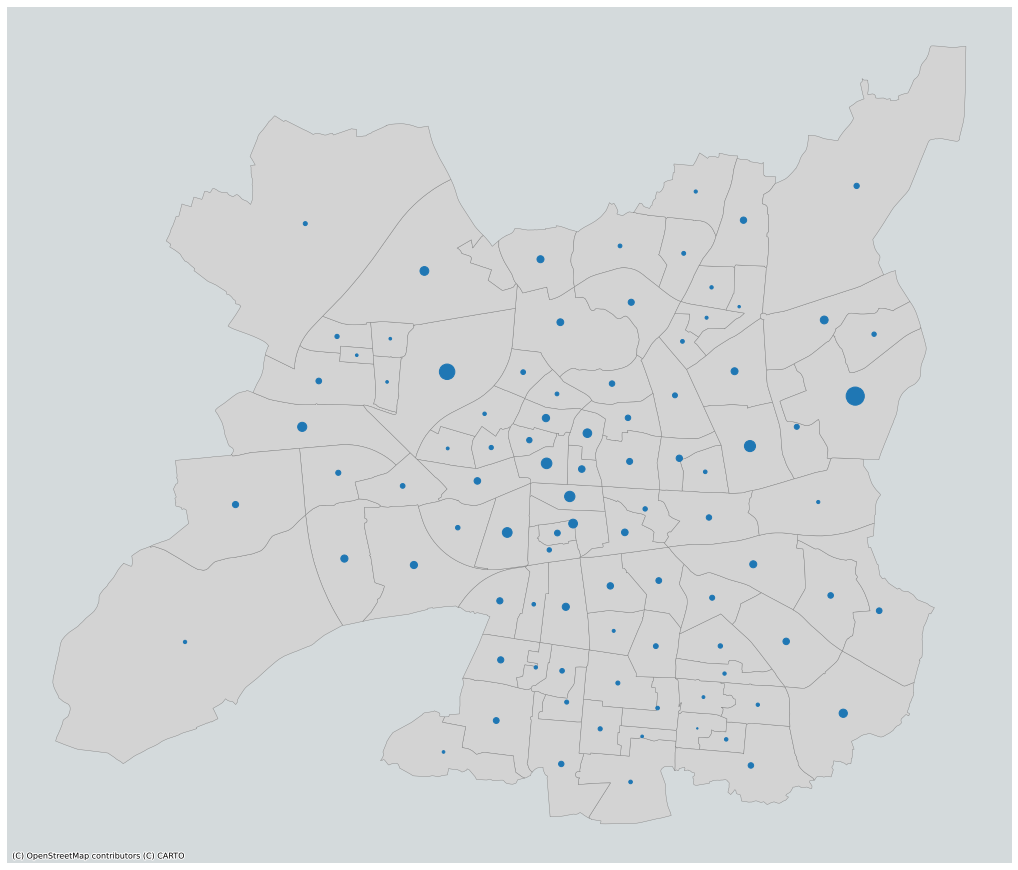

In [ ]:
#Carte du nombre de batiments à usage commercial ou serviciel par IRIS à Rennes

IRISRENNESBISCentro = IRISRENNESBIS.copy()
IRISRENNESBISCentro.geometry = IRISRENNESBIS['geometry'].centroid

Carte1, ax = plt.pyplot.subplots(figsize=(18,16))
IRISRENNESBIS.plot(ax=ax, color="lightgray", edgecolor="grey", linewidth=0.4)
IRISRENNESBISCentro.plot(ax=ax, markersize="NbBatiCOMSERV", alpha=1, scheme='quantiles', categorical=False, legend=True)
ctx.add_basemap(ax,  source=ctx.providers.CartoDB.Positron)
ax.axis("off")
plt.pyplot.show()

##Analyse spatiale